In [5]:
import quandl

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Set up your key to be able to get info about many stocks
quandl.ApiConfig.api_key = "YOUR_KEY"

In [5]:
#PCG = quandl.get('WIKI/PCG.11',start_date=start,end_date=end)
#PCG.to_csv("SSE-PCG.csv")
#BAYN = quandl.get('WIKI/BAYN.11',start_date=start,end_date=end)
#KOP = quandl.get('WIKI/KOP.11',start_date=start,end_date=end)

In [7]:
KOP = pd.read_csv('SSE-KOP.csv',index_col='Date',parse_dates=True) # 0.9
BAYN = pd.read_csv('SSE-BAYN.csv',index_col='Date',parse_dates=True) # 0.9
PCG = pd.read_csv('SSE-PCG.csv',index_col='Date',parse_dates=True) # 1.1
MDO = pd.read_csv('SSE-MDO.csv',index_col='Date',parse_dates=True) # 1.5
SU1N = pd.read_csv('SSE-SU1N.csv',index_col='Date',parse_dates=True) # 2.2
NESR = pd.read_csv('SSE-NESR.csv',index_col='Date',parse_dates=True) # 2.3
R6C1 = pd.read_csv('SSE-R6C1.csv',index_col='Date',parse_dates=True) # 2.4
SRB = pd.read_csv('SSE-SRB.csv',index_col='Date',parse_dates=True) # 2.9
WMT = pd.read_csv('SSE-WMT.csv',index_col='Date',parse_dates=True) # 3.1
_3V64 = pd.read_csv('SSE-3V64.csv',index_col='Date',parse_dates=True) # 3.9
BSB = pd.read_csv('SSE-BSB.csv',index_col='Date',parse_dates=True) # 4.1



In [8]:
kop = KOP.iloc[:,-2]
bay = BAYN.iloc[:,-2]

pcg = PCG.iloc[:,]
pcg = pd.Series(pcg['Adj. Close'])
pcg2 = pcg.sort_index(ascending=False)
pcg = pcg2

mdo = MDO.iloc[:,-2]
su1 = SU1N.iloc[:,-2]
nes = NESR.iloc[:,-2]
r6c = R6C1.iloc[:,-2]
srb = SRB.iloc[:,-2]
wmt = WMT.iloc[:,-2]
_3v = _3V64.iloc[:,-2]
bsb = BSB.iloc[:,-2]


In [9]:
kop = kop[:1000] 
bay = bay[:1000]
#pcg = pcg[:1000]
mdo = mdo[:1000]
su1= su1[:1000]
nes = nes[:1000]
r6c = r6c[:1000]
srb = srb[:1000]
wmt = wmt[:1000]
_3v = _3v[:1000] 
bsb = bsb[:1000]


In [10]:
stocks = pd.concat([kop,  bay,  mdo,   su1,   nes,   r6c,   srb,   wmt,   _3v,   bsb],axis=1)
stocks.columns =  ['kop','bay', 'mdo', 'su1', 'nes', 'r6c', 'srb', 'wmt', '_3v', 'bsb']
stocks.dropna(inplace=True)

In [11]:
stocks.head()

,kop,bay,mdo,su1,nes,r6c,srb,wmt,_3v,bsb
Date,,,,,,,,,,
2014-09-12,15.435,106.26,72.00,59.51,59.10,60.71,59.31,59.13,167.56,10.815
2014-09-15,15.595,105.88,72.18,59.14,58.64,58.68,57.70,58.81,165.92,10.680
2014-09-16,15.760,106.56,72.18,58.83,58.56,58.16,57.80,58.26,163.60,10.780
2014-09-17,15.770,106.32,72.39,59.61,58.78,58.29,57.58,58.50,165.83,10.775
2014-09-18,15.755,106.32,72.00,58.52,58.11,58.90,57.87,58.83,167.39,10.820


In [12]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

kop   -0.000233
bay   -0.000336
mdo    0.000841
su1    0.000246
nes    0.000271
r6c    0.000050
srb    0.000174
wmt    0.000507
_3v    0.000406
bsb    0.000844
dtype: float64

In [13]:
stocks.pct_change(1).corr()

,kop,bay,mdo,su1,nes,r6c,srb,wmt,_3v,bsb
kop,1.000000,0.153083,0.220527,0.195911,0.156689,0.167894,0.126837,0.120984,0.102472,0.060375
bay,0.153083,1.000000,0.337608,0.227120,0.375089,0.182883,0.182446,0.174632,0.209133,0.184138
mdo,0.220527,0.337608,1.000000,0.210827,0.370628,0.178406,0.325458,0.365101,0.307515,0.088846
su1,0.195911,0.227120,0.210827,1.000000,0.290397,0.208062,0.178495,0.184647,0.137156,0.117237
nes,0.156689,0.375089,0.370628,0.290397,1.000000,0.182456,0.220392,0.271081,0.158657,0.210247
r6c,0.167894,0.182883,0.178406,0.208062,0.182456,1.000000,0.130910,0.097315,0.092471,0.213152
srb,0.126837,0.182446,0.325458,0.178495,0.220392,0.130910,1.000000,0.270206,0.193301,0.107620
wmt,0.120984,0.174632,0.365101,0.184647,0.271081,0.097315,0.270206,1.000000,0.220304,0.107889
_3v,0.102472,0.209133,0.307515,0.137156,0.158657,0.092471,0.193301,0.220304,1.000000,-0.012513
bsb,0.060375,0.184138,0.088846,0.117237,0.210247,0.213152,0.107620,0.107889,-0.012513,1.000000


In [15]:
corr_tot = stocks.corr()
corr_tot

,kop,bay,mdo,su1,nes,r6c,srb,wmt,_3v,bsb
kop,1.000000,0.205809,-0.540677,0.084276,-0.000122,-0.624949,0.186682,-0.663879,-0.341000,-0.429291
bay,0.205809,1.000000,-0.469360,-0.131542,0.080637,0.078180,0.480133,-0.169322,0.113853,-0.040764
mdo,-0.540677,-0.469360,1.000000,0.526428,0.540244,0.140688,-0.513403,0.530309,-0.260389,0.130992
su1,0.084276,-0.131542,0.526428,1.000000,0.661575,-0.046627,-0.145138,0.292921,-0.346078,-0.077506
nes,-0.000122,0.080637,0.540244,0.661575,1.000000,-0.114588,-0.163858,0.304688,-0.373194,-0.007533
r6c,-0.624949,0.078180,0.140688,-0.046627,-0.114588,1.000000,0.128695,0.653905,0.532217,0.347329
srb,0.186682,0.480133,-0.513403,-0.145138,-0.163858,0.128695,1.000000,-0.003507,0.603076,-0.089416
wmt,-0.663879,-0.169322,0.530309,0.292921,0.304688,0.653905,-0.003507,1.000000,0.353860,0.212550
_3v,-0.341000,0.113853,-0.260389,-0.346078,-0.373194,0.532217,0.603076,0.353860,1.000000,0.043108
bsb,-0.429291,-0.040764,0.130992,-0.077506,-0.007533,0.347329,-0.089416,0.212550,0.043108,1.000000


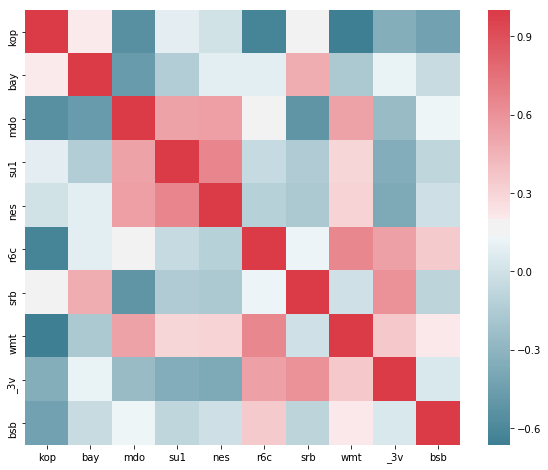

In [16]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
dataframe = stocks

corr = corr_tot

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

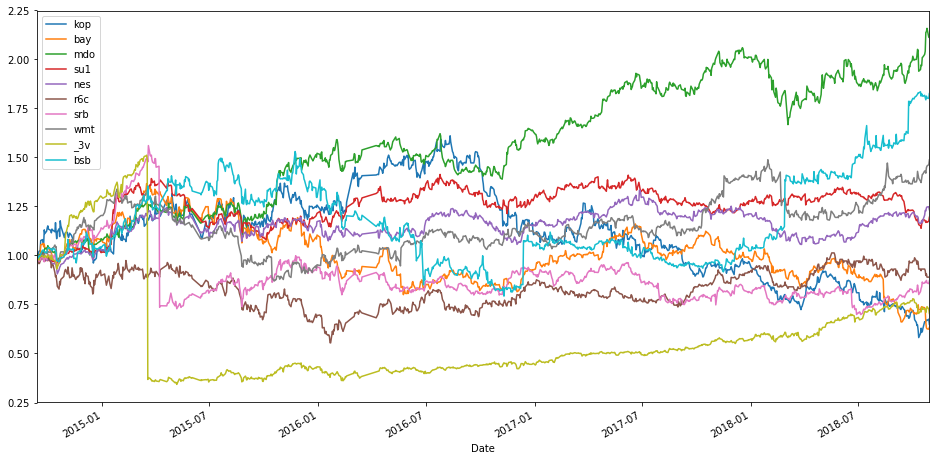

In [17]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot(figsize=(16, 8))

In [18]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,kop,bay,mdo,su1,nes,r6c,srb,wmt,_3v,bsb
Date,,,,,,,,,,
2014-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-15,0.010366,-0.003576,0.002500,-0.006217,-0.007783,-0.033438,-0.027146,-0.005412,-0.009788,-0.012483
2014-09-16,0.010580,0.006422,0.000000,-0.005242,-0.001364,-0.008862,0.001733,-0.009352,-0.013983,0.009363
2014-09-17,0.000635,-0.002252,0.002909,0.013259,0.003757,0.002235,-0.003806,0.004119,0.013631,-0.000464
2014-09-18,-0.000951,0.000000,-0.005387,-0.018286,-0.011398,0.010465,0.005036,0.005641,0.009407,0.004176


In [19]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,kop,bay,mdo,su1,nes,r6c,srb,wmt,_3v,bsb
Date,,,,,,,,,,
2014-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-15,0.010313,-0.003583,0.002497,-0.006237,-0.007814,-0.034009,-0.027521,-0.005427,-0.009836,-0.012561
2014-09-16,0.010525,0.006402,0.000000,-0.005256,-0.001365,-0.008901,0.001732,-0.009396,-0.014081,0.009320
2014-09-17,0.000634,-0.002255,0.002905,0.013171,0.003750,0.002233,-0.003813,0.004111,0.013539,-0.000464
2014-09-18,-0.000952,0.000000,-0.005402,-0.018455,-0.011464,0.010411,0.005024,0.005625,0.009363,0.004168


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bd1ff28>,
      dtype=object)

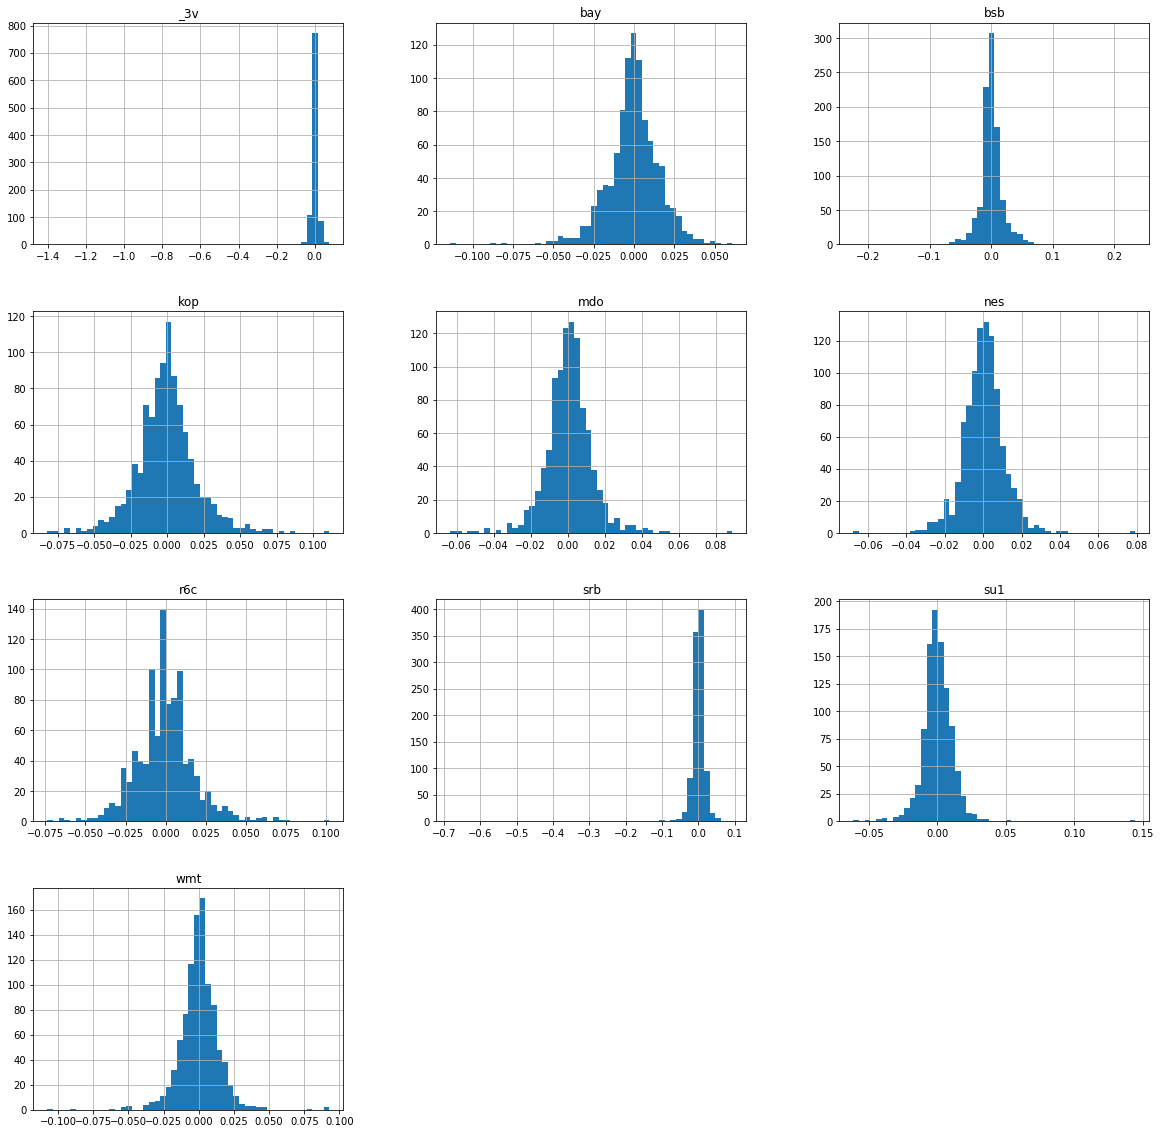

In [20]:
log_ret.hist(bins=50, figsize=(20,20))

In [21]:
log_ret.describe()

,kop,bay,mdo,su1,nes,r6c,srb,wmt,_3v,bsb
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,-0.000440,-0.000466,0.000762,0.000181,0.000214,-0.000119,-0.000142,0.000405,-0.000357,0.000614
std,0.020364,0.016199,0.012611,0.011345,0.010727,0.018395,0.026931,0.014295,0.047004,0.021388
min,-0.082017,-0.113865,-0.063345,-0.061246,-0.067524,-0.073727,-0.682234,-0.107525,-1.401108,-0.223535
25%,-0.011590,-0.008516,-0.005950,-0.005735,-0.005739,-0.009852,-0.006490,-0.006317,-0.005922,-0.007360
50%,-0.000547,-0.000148,0.000787,0.000000,0.000300,0.000000,0.000978,0.000610,0.001282,-0.000513
75%,0.009733,0.008517,0.006987,0.005877,0.006111,0.008811,0.008529,0.007337,0.008631,0.008202
max,0.111102,0.060939,0.088834,0.144338,0.079134,0.102066,0.093090,0.092741,0.075310,0.234036


In [22]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://i.stack.imgur.com/U4B9I.png")

In [23]:
# Set seed (optional)
np.random.seed(1010)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(10))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['kop', 'bay', 'mdo', 'su1', 'nes', 'r6c', 'srb', 'wmt', '_3v', 'bsb'], dtype='object')


Creating Random Weights
[0.39425649 0.17559247 0.07270586 0.19188087 0.39980431 0.41812333
 0.7625821  0.5214099  0.41088322 0.53744427]


Rebalance to sum to 1.0
[0.10149001 0.04520124 0.01871604 0.04939422 0.10291813 0.10763384
 0.19630486 0.134222   0.10577008 0.13834959]


Expected Portfolio Return
0.010117731077327113


Expected Volatility
0.1754952940384645


Sharpe Ratio
0.0576524352562385


In [24]:
import time
start_time = time.time()

num_simulations = 50000

all_weights = np.zeros((num_simulations,len(stocks.columns)))
ret_arr = np.zeros(num_simulations)
vol_arr = np.zeros(num_simulations)
sharpe_arr = np.zeros(num_simulations)

for ind in range(num_simulations):

    # Create Random Weights
    weights = np.array(np.random.random(10))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    
    
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 70.03098201751709 seconds ---


In [25]:
sharpe_arr.max()

0.7520881025370044

In [26]:
sharpe_arr.argmax()

12572

In [27]:
all_weights[sharpe_arr.argmax(), :]

array([0.00497283, 0.00128311, 0.30272415, 0.1482364 , 0.27705971,
       0.03546845, 0.00962874, 0.09714489, 0.02861052, 0.09487121])

In [28]:
percentage = [0.9, 0.9, 1.1, 1.5, 2.2, 2.3, 2.4, 2.9, 3.1, 3.9, 4.1]
percentage = [0.9, 0.9,      1.5, 2.2, 2.3, 2.4, 2.9, 3.1, 3.9, 4.1] # drop pcg
tot = sum(x for x in percentage)
tot_weights_norm_curr = np.array([x/tot for x in percentage])
tot_weights_norm_curr

array([0.03719008, 0.03719008, 0.06198347, 0.09090909, 0.09504132,
       0.09917355, 0.11983471, 0.12809917, 0.16115702, 0.16942149])

In [29]:
print("tot_weights_norm_curr", tot_weights_norm_curr)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret_curr = np.sum(log_ret.mean() * tot_weights_norm_curr) *252
print(exp_ret_curr)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol_curr = np.sqrt(np.dot(tot_weights_norm_curr.T, np.dot(log_ret.cov() * 252, tot_weights_norm_curr)))
print(exp_vol_curr)
print('\n')

tot_weights_norm_curr [0.03719008 0.03719008 0.06198347 0.09090909 0.09504132 0.09917355
 0.11983471 0.12809917 0.16115702 0.16942149]


Expected Portfolio Return
0.030152241839332787


Expected Volatility
0.18527771646973332




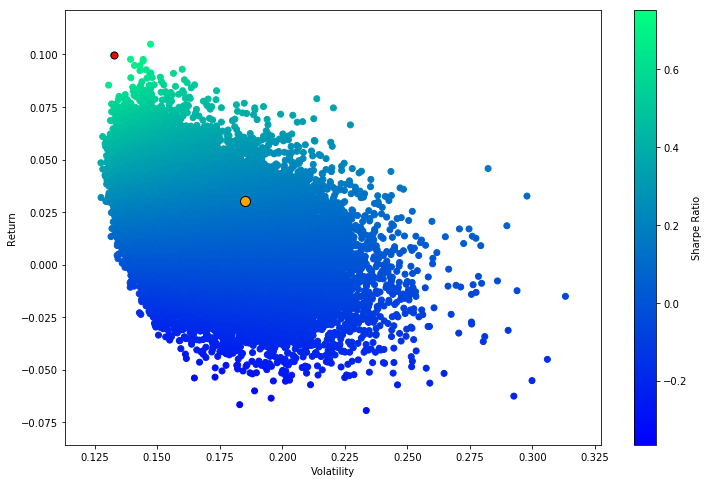

In [60]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='winter')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')
plt.scatter(exp_vol_curr,exp_ret_curr,c='orange',s=100,edgecolors='black')

In [61]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean()*weights)*252
    vol = np.sqrt( np.dot(weights.T, np.dot(log_ret.cov()*252, weights)) )
    sr=ret/vol
    return np.array([ret, vol, sr])

In [62]:
from scipy.optimize import minimize

In [63]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [64]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*(-1)

In [65]:
def check_sum(weights):
    return np.sum(weights)-1

In [66]:
cons = ({'type':'eq', 'fun':check_sum})

In [67]:
A= (0,0,0,0,0, 0,0,0,0,0)
B = (1,1,1,1,1, 1,1,1,1,1 )
bounds = tuple(zip(A,B))
bounds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [ ]:
init_guess = [0.1]*10

In [68]:
opt_results=minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results

     fun: -1.0301944189906225
     jac: array([ 1.06875719e+00,  1.24397132e+00, -3.99351120e-06, -3.86521220e-04,
        1.17143780e-01,  5.90945631e-01,  9.04182181e-01,  6.18398190e-05,
        1.35138220e+00, -1.83284283e-06])
 message: 'Optimization terminated successfully.'
    nfev: 73
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.89667292e-16, 0.00000000e+00, 7.57171935e-01, 8.76156633e-04,
       0.00000000e+00, 2.14612258e-16, 2.13579660e-16, 6.00307650e-02,
       0.00000000e+00, 1.81921143e-01])

In [69]:
ret, vol, sharpe = get_ret_vol_sr(opt_results.x)
sharpe

1.0301944189906225

In [70]:
frontier_y = np.linspace(0, 0.2, 100)


In [71]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [72]:
start_time = time.time()

frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

print("--- %s seconds ---" % (time.time() - start_time))

--- 31.697314977645874 seconds ---


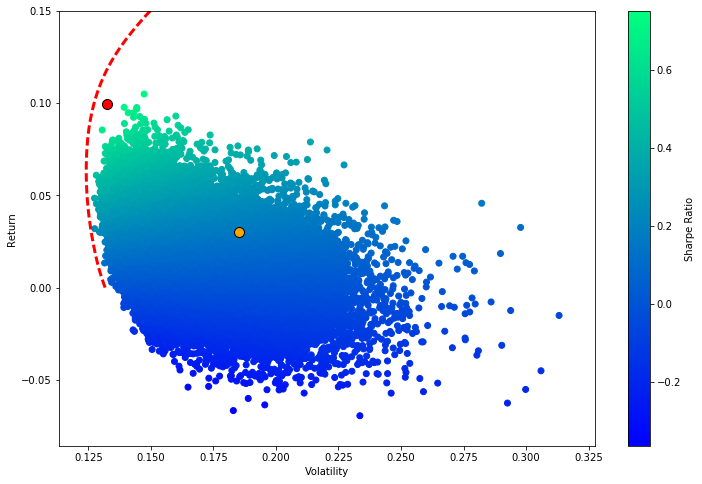

In [73]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='winter')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylim(ymax=0.15)
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'r--',linewidth=3)

max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=100,edgecolors='black')
plt.scatter(exp_vol_curr,exp_ret_curr,c='orange',s=100,edgecolors='black')

In [74]:
print ("Improving Returns by", abs(exp_ret_curr - max_sr_ret)/max_sr_ret)

Improving Returns by 0.6975045619740663


In [75]:
print ("Taking less risk by", (exp_vol_curr -max_sr_vol)/ max_sr_vol)

Taking less risk by 0.39794836210715034
